After the catastrophic crypto market crash, ignited by UST Terra's failure to maintain its dollar pegging, we aim to find correlations and clustering amongst all StableCoins and defi farm Tokens.

Here is the list of stablecoins ranked by MC https://coinmarketcap.com/view/stablecoin/ and a list of the of Defi Tokens ranked by MC https://coinmarketcap.com/view/defi/

In [31]:
from cryptocmd import CmcScraper
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
from sklearn import cluster, covariance, manifold
symbol_dict = {
    "USDT":"Tether",
    "USDC":"USD Coin(base)",
    "BUSD":"Binance USD",
    "DAI":"DAI Maker",
    "UST":"TERRA",
    "TUSD":"TrueUSD",
    "USDP":"PAX Dollar",
    "USDN":"Neutrino USD",
    "FEI":"Fei USD",
    "GUSD":"Gemini USD",
    "USDD":"USDD",

    "AVAX":"Avalanche",
    "WBTC":"Wrapped BTC",
    "UNI":"Uniswap",
    "LINK":"ChainLink",
    "XTZ":"Tezos",
    "MKR":"Maker",
    "THETA":"Theta Network",
    "CAKE":"Pancake Swap",
    "GRT":"The Graph",
    "AAVE":"Aave",
    "RUNE":"ThorChain",
    "FTM":"Fantom",
    "CVX":"Convex Finance",
    "STX":"Stacks",
    "LRC":"Loopring",
    "CRV":"CurveDao",
    "BAT":"Basic Attention Token",
    "COMP":"Compound",
    "LDO":"Lido DAO",
    "KAVA":"Kava",
    "1INCH":"1inch",
    "YFI":"Yearn Finance",
    "ZRX":"0x"
}

In [32]:
def load_fresh_data_and_save_to_disc(symbol_dict, save_path):
    symbols, names = np.array(sorted(symbol_dict.items())).T
    for symbol in symbols:
        scraper = CmcScraper(symbol)

        df_coin_prices = scraper.get_dataframe()
        df = pd.DataFrame()
        print(f' Fetching prices for {symbol}')

        df[symbol + '_Open'] = df_coin_prices['Open']
        df[symbol + '_Close'] = df_coin_prices['Close']
        df[symbol + '_Avg'] = (df_coin_prices['Close'] + df_coin_prices['Open']) / 2

        df[symbol + '_p'] = (df_coin_prices['Open'] - df_coin_prices['Close']) / df_coin_prices['Open']

        if symbol == symbols[0]:
            df_crypto = df.copy()
        else:
            df_crypto = pd.merge(
                left = df_crypto, right = df , how = 'outer',
                left_index = True, right_index = True)

        filter_columns = [s for s in df_crypto.columns if '_p' in s]
        X_df_filtered = df_crypto[filter_columns].copy()
    X_df_filtered.to_csv(save_path + 'historical_crypto_prices.csv')
    return names, symbols, X_df_filtered
save_path = ''

new_data = True
if new_data == False:
    try:
        print('loading from disk')
        X_df_filtered = pd.read_csv(save_path + 'historical_crypto_prices.csv')
        if 'Unnamed: 0' in X_df_filtered.columns:
            X_df_filtered = X_df_filtered.drop(['Unnamed: 0'], axis = 1)
            symbols, names = np.array(sorted(symbol_dict.items())).T
        print(list(X_df_filtered))
    except:
        print("No existing price data found - loading fresh data from CMC then saving locally")
        names, symbols, X_df_filtered = load_fresh_data_and_save_to_disc(symbol_dict, save_path)
        print(list(symbols))
else:
    print('loading fresh data from CMC and saving locally')
    names, symbols, X_df_filtered = load_fresh_data_and_save_to_disc(symbol_dict, save_path)
    print(list(symbols))

t = 100 #number of days we collect data 

X_df_filtered = X_df_filtered[:t]
X_df_filtered.head()


loading fresh data from CMC and saving locally
 Fetching prices for 1INCH
 Fetching prices for AAVE
 Fetching prices for AVAX
 Fetching prices for BAT
 Fetching prices for BUSD
 Fetching prices for CAKE
 Fetching prices for COMP
 Fetching prices for CRV
 Fetching prices for CVX
 Fetching prices for DAI
 Fetching prices for FEI
 Fetching prices for FTM
 Fetching prices for GRT
 Fetching prices for GUSD
 Fetching prices for KAVA
 Fetching prices for LDO
 Fetching prices for LINK
 Fetching prices for LRC
 Fetching prices for MKR
 Fetching prices for RUNE
 Fetching prices for STX
 Fetching prices for THETA
 Fetching prices for TUSD
 Fetching prices for UNI
 Fetching prices for USDC
 Fetching prices for USDD
 Fetching prices for USDN
 Fetching prices for USDP
 Fetching prices for USDT
 Fetching prices for UST
 Fetching prices for WBTC
 Fetching prices for XTZ
 Fetching prices for YFI
 Fetching prices for ZRX
['1INCH', 'AAVE', 'AVAX', 'BAT', 'BUSD', 'CAKE', 'COMP', 'CRV', 'CVX', 'DAI', 'FEI'

,1INCH_p,AAVE_p,AVAX_p,BAT_p,BUSD_p,CAKE_p,COMP_p,CRV_p,CVX_p,DAI_p,...,USDC_p,USDD_p,USDN_p,USDP_p,USDT_p,UST_p,WBTC_p,XTZ_p,YFI_p,ZRX_p
0,-0.037986,-0.059288,-0.072651,-0.030188,-0.000121,-0.086067,-0.045330,-0.060671,-0.001508,0.000616,...,0.000185,-0.001856,0.005219,-0.000162,-0.000289,0.098550,-0.037984,-0.046543,-0.028491,-0.062575
1,-0.024839,-0.054239,-0.060567,-0.087938,0.000891,0.003909,-0.046185,-0.074749,0.067130,-0.001895,...,0.000037,0.000450,-0.006093,-0.003158,-0.000539,-0.213676,-0.028429,-0.034906,-0.033072,-0.133289
2,-0.136555,-0.061900,-0.059258,-0.072590,0.002325,-0.116246,-0.117644,-0.010262,-0.091188,0.001354,...,0.000255,-0.003472,-0.064172,0.001441,-0.000714,0.620254,-0.007360,-0.054234,0.000440,-0.097677
3,0.209830,0.053349,0.020007,0.034164,-0.000669,0.086655,0.110152,0.121570,0.171177,0.000239,...,0.000118,-0.002898,-0.082070,0.000767,-0.001737,0.489945,-0.006531,0.055933,0.125382,0.125018
4,0.017413,0.222481,0.304547,0.203706,-0.003383,0.271441,0.220393,0.250179,0.336209,-0.001342,...,-0.000981,0.005670,0.135969,-0.001712,0.003919,-0.002208,0.069480,0.159810,0.173042,0.245422


Charting all Crypto Prices

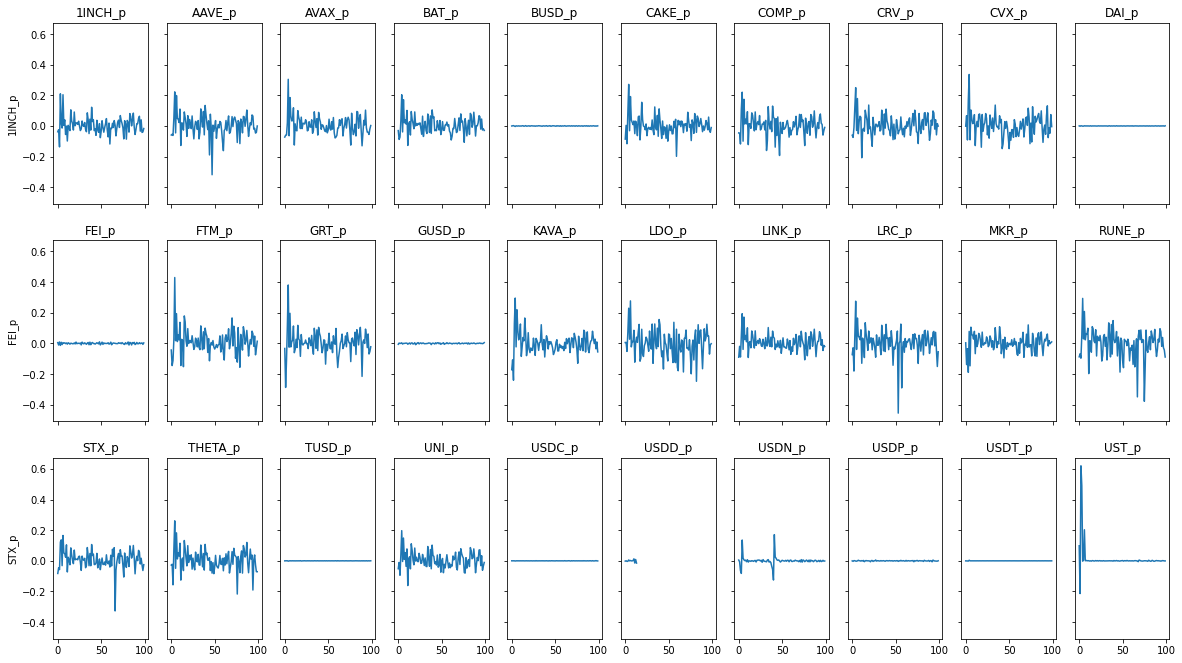

In [33]:
list_length = X_df_filtered.shape[1]
ncols = 10
nrows = int(round(list_length / ncols, 0))
height = list_length / 3 if list_length > 30 else 4
fig, axs = plt.subplots(nrows = nrows, ncols = ncols, sharex = True, sharey = True, figsize = (20, height))

for i, ax in enumerate(fig.axes):
    if i < list_length:
        sns.lineplot(data = X_df_filtered, x = X_df_filtered.index, y = X_df_filtered.iloc[:, i], ax = ax)
        ax.set_title(X_df_filtered.columns[i])
plt.show()

As shown by the graphs above, we notice that GUSD, DAI, BUSD, USDC, USDT are the most stable stablecoins.

In [34]:
X_df = pd.DataFrame(np.array(X_df_filtered)).dropna()

X = X_df.copy()

X /= X.std(axis = 0)
X = np.array(X)

edge_model = covariance.GraphicalLassoCV()

edge_model.fit(X)
cluster_centers_indices, labels = cluster.affinity_propagation(edge_model.covariance_, random_state=1)
cluster_dict = {}
n_labels = labels.max()
print(f"{n_labels} Clusters")
for i in range(n_labels + 1):
    clusters = ", ".join(names[labels == i])
    print('Cluster %i: %s' % ((i + 1), clusters))
    cluster_dict[i] = (clusters)

6 Clusters
Cluster 1: 1inch, Aave, Avalanche, Basic Attention Token, Pancake Swap, Compound, CurveDao, Convex Finance, Fantom, The Graph, Gemini USD, Kava, Lido DAO, ChainLink, Loopring, ThorChain, Stacks, Theta Network, Uniswap, Wrapped BTC, Tezos, Yearn Finance, 0x
Cluster 2: Fei USD, Maker
Cluster 3: Binance USD, DAI Maker, TrueUSD, USD Coin(base)
Cluster 4: USDD
Cluster 5: Neutrino USD, Tether
Cluster 6: PAX Dollar
Cluster 7: TERRA


In [35]:
#Create a node_position_model that finds the best positions of each asset in a 2D area

node_position_model = manifold.LocallyLinearEmbedding(n_components=2, eigen_solver='dense', n_neighbors = 20)
embedding = node_position_model.fit_transform(X.T).T

pd.DataFrame(embedding)

partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))

partial_correlations *= d 
partial_correlations *= d[:, np.newaxis]

non_zero = (np.abs(np.triu(partial_correlations, k= 1)) > 0.02)

#Converting Position model into a DF

data = pd.DataFrame.from_dict({"embedding_x": embedding[0], "embedding_y": embedding[1]})

data["labels"] = labels

print(data.shape)
data.head

(34, 3)


<bound method NDFrame.head of     embedding_x  embedding_y  labels
0     -0.251970    -0.320248       0
1     -0.062586     0.030739       0
2     -0.003223     0.099724       0
3     -0.109451     0.089283       0
4      0.339335    -0.067628       2
5     -0.123759    -0.034642       0
6     -0.154822    -0.085743       0
7     -0.169414     0.074307       0
8     -0.112050    -0.066714       0
9      0.204957    -0.090874       2
10     0.358826     0.275166       1
11    -0.109291     0.226279       0
12    -0.178416     0.118466       0
13    -0.037885    -0.088447       0
14    -0.133928    -0.049542       0
15    -0.137443     0.043061       0
16    -0.089254    -0.017719       0
17    -0.112623     0.037630       0
18     0.305121     0.148852       1
19    -0.119250     0.153015       0
20    -0.070392    -0.168085       0
21    -0.154150     0.008289       0
22     0.193989    -0.362028       2
23    -0.143257     0.083413       0
24     0.217506    -0.301407       2
25     0

<AxesSubplot:ylabel='Count'>

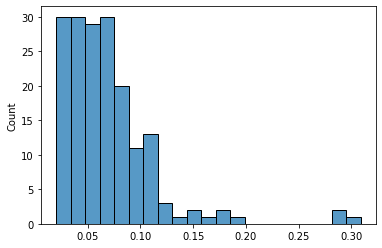

In [36]:
start_idx, end_idx = np.where(non_zero)
segments = [[np.array([embedding[:, start], embedding[:, stop]]).T, start, stop] for start, stop in zip(start_idx, end_idx)]

#Creating a normalized representation of partial correlation whose covariance we will use later to show the strength of the connections between cryptos

pc  = np.abs(partial_correlations[non_zero])
normalized = (pc - min(pc)) / (max(pc) - min(pc))

#Plotting the distribution of covariances between the cryptos 

sns.histplot(pc)

Visualizing the clusters

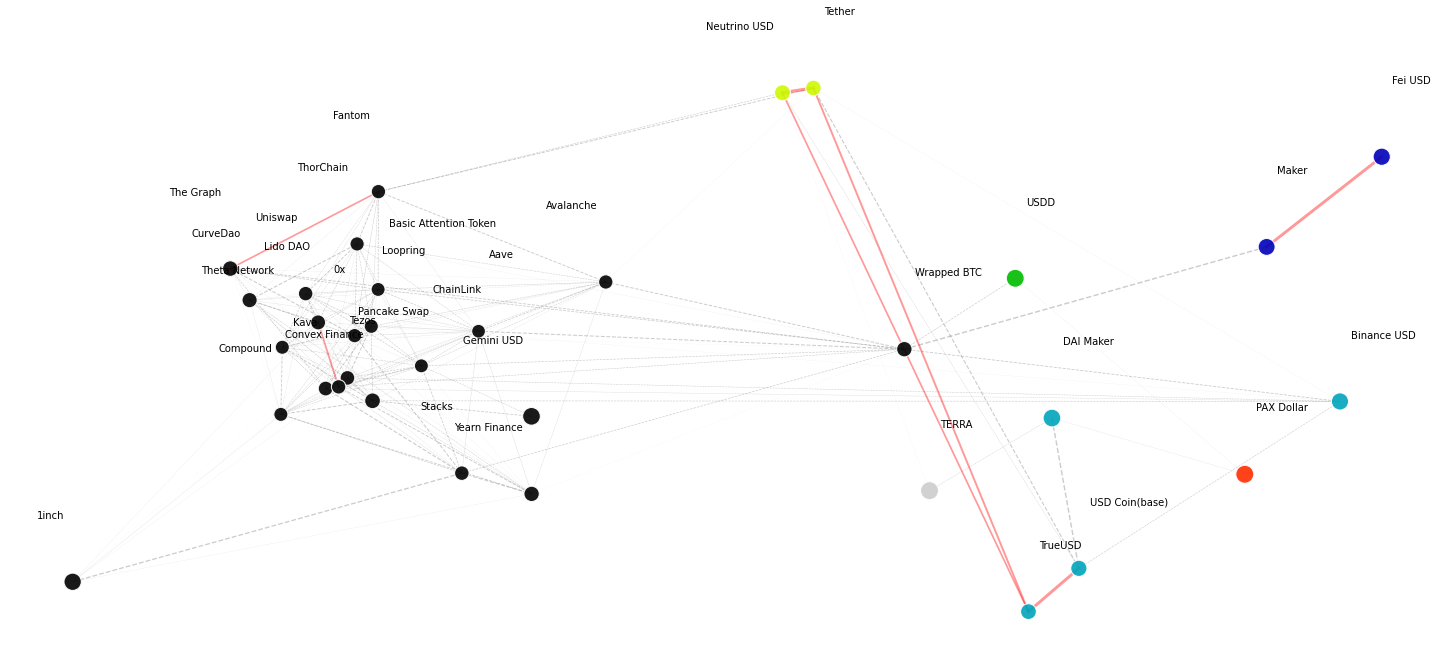

In [37]:
plt.figure(1, facecolor='w', figsize=(20,8))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])

sc = sns.scatterplot(data = data, x = "embedding_x", y = 'embedding_y', zorder = 1, s = 350 * d ** 2, c = labels, cmap = plt.cm.nipy_spectral, alpha = .9, palette = 'muted')
line_strength = 3.2

for index, ((x, y), start, stop) in enumerate(segments):
    norm_partial_correlation = normalized[index]
    if list(data.iloc[[start]]['labels'])[0] == list(data.iloc[[stop]]['labels'])[0]:
        if norm_partial_correlation > 0.5:
            color = 'red'; linestyle = 'solid'
        else :
            color = 'grey'; linestyle = 'dashed'
    else:
        if norm_partial_correlation > 0.5:
            color = 'red'; linestyle = 'solid'
        else:
            color = 'grey'; linestyle = 'dashed'
    plt.plot(x, y, alpha = .4 , zorder = 0, linewidth = normalized[index] * line_strength, color = color, linestyle = linestyle)

#Label the node and position the labels 

for index, (name, label, (x,y)) in enumerate(zip(names, labels, embedding.T)):
    dx = x - embedding[0]
    dy = y - embedding[1]
    dy[index], dx[index] = 1, 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]

    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .005
    else:
        horizontalalignment = 'right'
        x = x - .004
    
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + 0.1
    else:
        verticalalignment = 'top'
        y = y + 0.1
    plt.text(x, y , name, size = 10, 
            horizontalalignment = horizontalalignment, 
            verticalalignment = verticalalignment)
plt.axis('off')
plt.show()

3D Representation

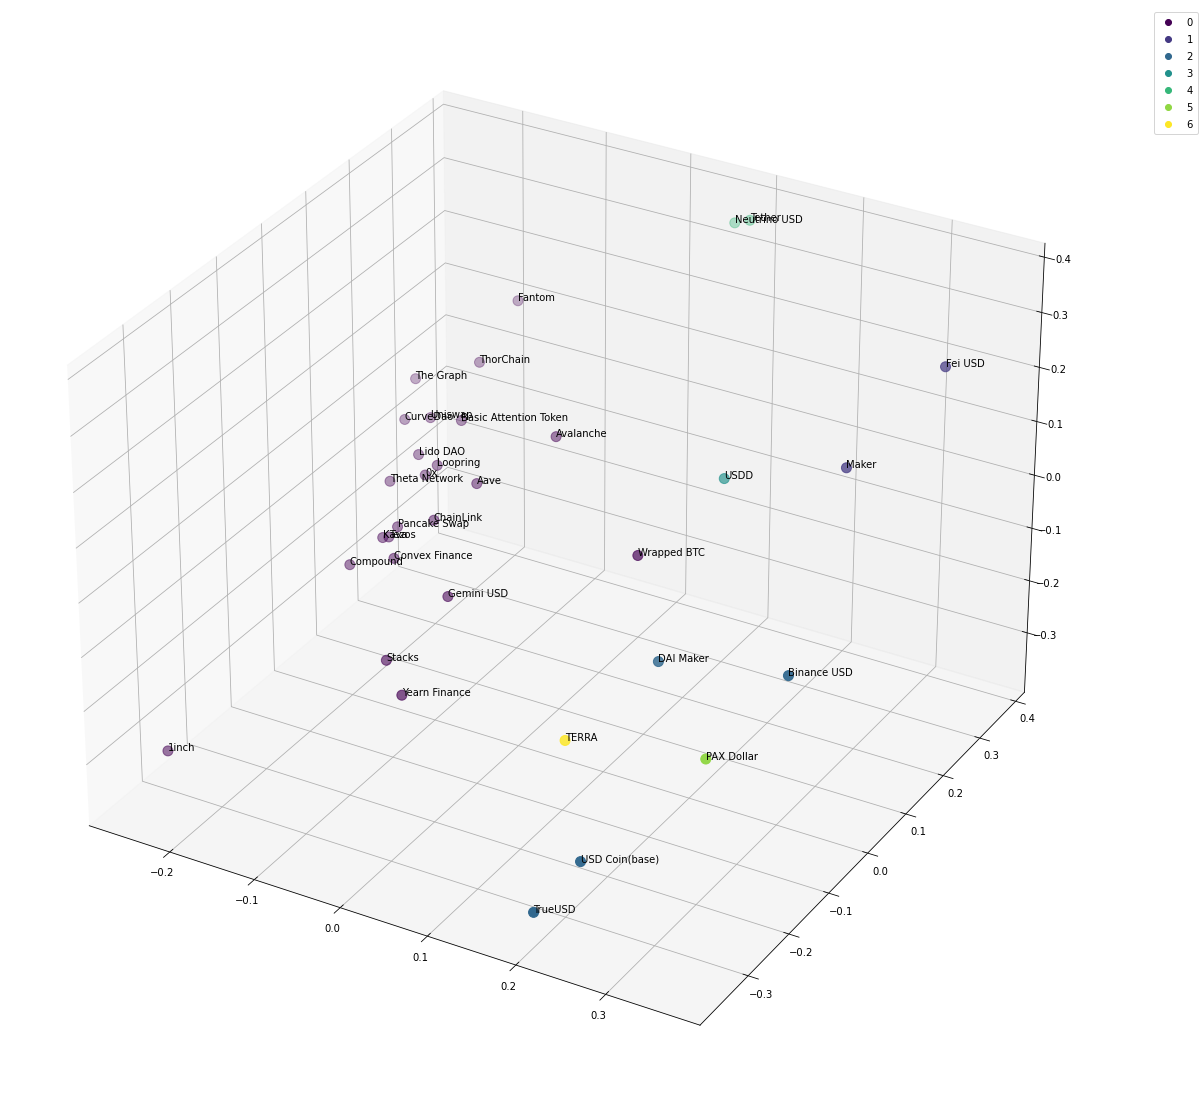

In [38]:
node_position_model = manifold.LocallyLinearEmbedding(n_components=3, eigen_solver= 'dense', n_neighbors = 20)
embedding = node_position_model.fit_transform(X.T).T

#Results are X Y coordinates of each crypto

pd.DataFrame(embedding)

partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))

partial_correlations *= d
partial_correlations *= d[:, np.newaxis]

non_zero = (np.abs(np.triu(partial_correlations, k = 1)) > 0.02)
data = pd.DataFrame.from_dict({"embedding_x": embedding[0], "embedding_y": embedding[1], "embedding_z": embedding[1]})
data["labels"] = labels
data['names'] = names 

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection = '3d')
xs = data["embedding_x"]
ys = data["embedding_y"]
zs = data["embedding_z"]
sc = ax.scatter(xs, ys, zs, c = labels, s = 100)

for i in range(len(data)):
    x = xs[i]
    y = ys[i]
    z = zs[i]

    label = data['names'][i]
    ax.text(x, y, z, label)
plt.legend(*sc.legend_elements(), bbox_to_anchor = (1.05, 1), loc = 2)
plt.show()